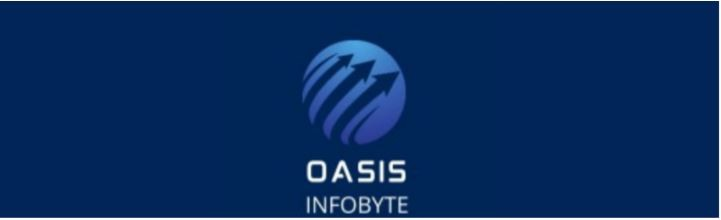

 ## Oasis Internship, January- 2024
 
 ### Samala Sandeep, Data Analytics Intern

# Project Title : Wine Quality Prediction

### Dataset Link : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

# Introduction: Wine Quality Prediction using Machine Learning


In the vast world of viticulture, the quality of wine is a paramount aspect that greatly influences consumer satisfaction and market competitiveness. Traditionally, winemakers rely on their expertise and experience to assess and enhance wine quality. However, the integration of machine learning can provide a systematic and data-driven approach to predict wine quality based on the chemical characteristics of the wine.

This project aims to harness the power of machine learning algorithms to predict the quality of wine using a dataset containing diverse chemical attributes. By leveraging three distinct classifier models – Random Forest, Stochastic Gradient Descent (SGD), and Support Vector Classifier (SVC) – we aim to develop robust and accurate predictions.


## Objectives:


Classifier Model Exploration:
Investigate the performance of three different machine learning classifiers to determine their suitability for wine quality prediction.Understand the strengths and weaknesses of Random Forest, SGD, and SVC in the context of viticulture.


## Chemical Quality Analysis:
Explore the influence of various chemical qualities, such as density and acidity, on the overall quality of wine.
Identify key features that significantly contribute to the prediction of wine quality.


## Data Manipulation and Visualization:
Employ Pandas for effective data manipulation, addressing missing values and ensuring the dataset is prepared for analysis.
Utilize Seaborn and Matplotlib for visualizing patterns and relationships within the dataset, offering a comprehensive understanding of chemical attributes and wine quality.


## Model Training and Evaluation:
Implement Random Forest, SGD, and SVC classifiers using scikit-learn.
Evaluate the performance of each model through metrics like accuracy, precision, recall, and F1 score, ensuring a thorough assessment of their predictive capabilities.


## Insight Generation:
Extract insights from the model predictions and analyze the importance of different chemical features in determining wine quality.
Provide actionable information for winemakers to potentially enhance the quality of their products.

# Import Libraries:

Importing necessary libraries sets the foundation for data analysis and machine learning.

pandas for data manipulation, numpy for numerical operations, and seaborn and matplotlib.pyplot for visualization.

Importing machine learning modules from scikit-learn: train_test_split for data splitting, classifiers like RandomForestClassifier, SGDClassifier, and SVC.

Importing metrics from scikit-learn for model evaluation: accuracy_score, classification_report, and confusion_matrix.

Finally, importing StandardScaler for feature scaling and Axes3D from mpl_toolkits.mplot3d for 3D plotting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Read the Dataset:

Reading the dataset is essential to understand the underlying data. The dataset is loaded into a pandas DataFrame (df), allowing for easy manipulation and analysis.

In [59]:

df = pd.read_csv('Task6.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

# Explore the Dataset:

In [3]:
# Explore the dataset
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# Select Columns for Analysis:

In [6]:
# Example assuming 'quality' is the target variable
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']


In [7]:
# Select specific columns for analysis
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
selected_df = df[selected_columns]

# Create a new feature by combining two existing features
selected_df['total_sulfur_dioxide'] = df['free sulfur dioxide'] + df['total sulfur dioxide']



C:\Users\admin\AppData\Local\Temp\ipykernel_15000\2120439060.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['total_sulfur_dioxide'] = df['free sulfur dioxide'] + df['total sulfur dioxide']


# Data Manipulation with NumPy
# Convert Pandas DataFrame to NumPy array

In [8]:

data_array = selected_df.to_numpy()

# Perform array operations
mean_values = np.mean(data_array, axis=0)
std_dev_values = np.std(data_array, axis=0)

# Display mean and standard deviation for each column
print("\nMean values for each column:")
print(mean_values)

print("\nStandard deviation for each column:")
print(std_dev_values)


Mean values for each column:
[ 8.31111111  0.53133858  0.26836395  2.53215223  0.99673041  3.31101487
  0.65770779 10.4421114   5.65704287 61.53018373]

Standard deviation for each column:
[1.74683037e+00 1.79554596e-01 1.96599794e-01 1.35532420e+00
 1.92422483e-03 1.56595513e-01 1.70324158e-01 1.08172210e+00
 8.05471667e-01 4.02817256e+01]


# Data Visualization:

<Figure size 720x576 with 0 Axes>

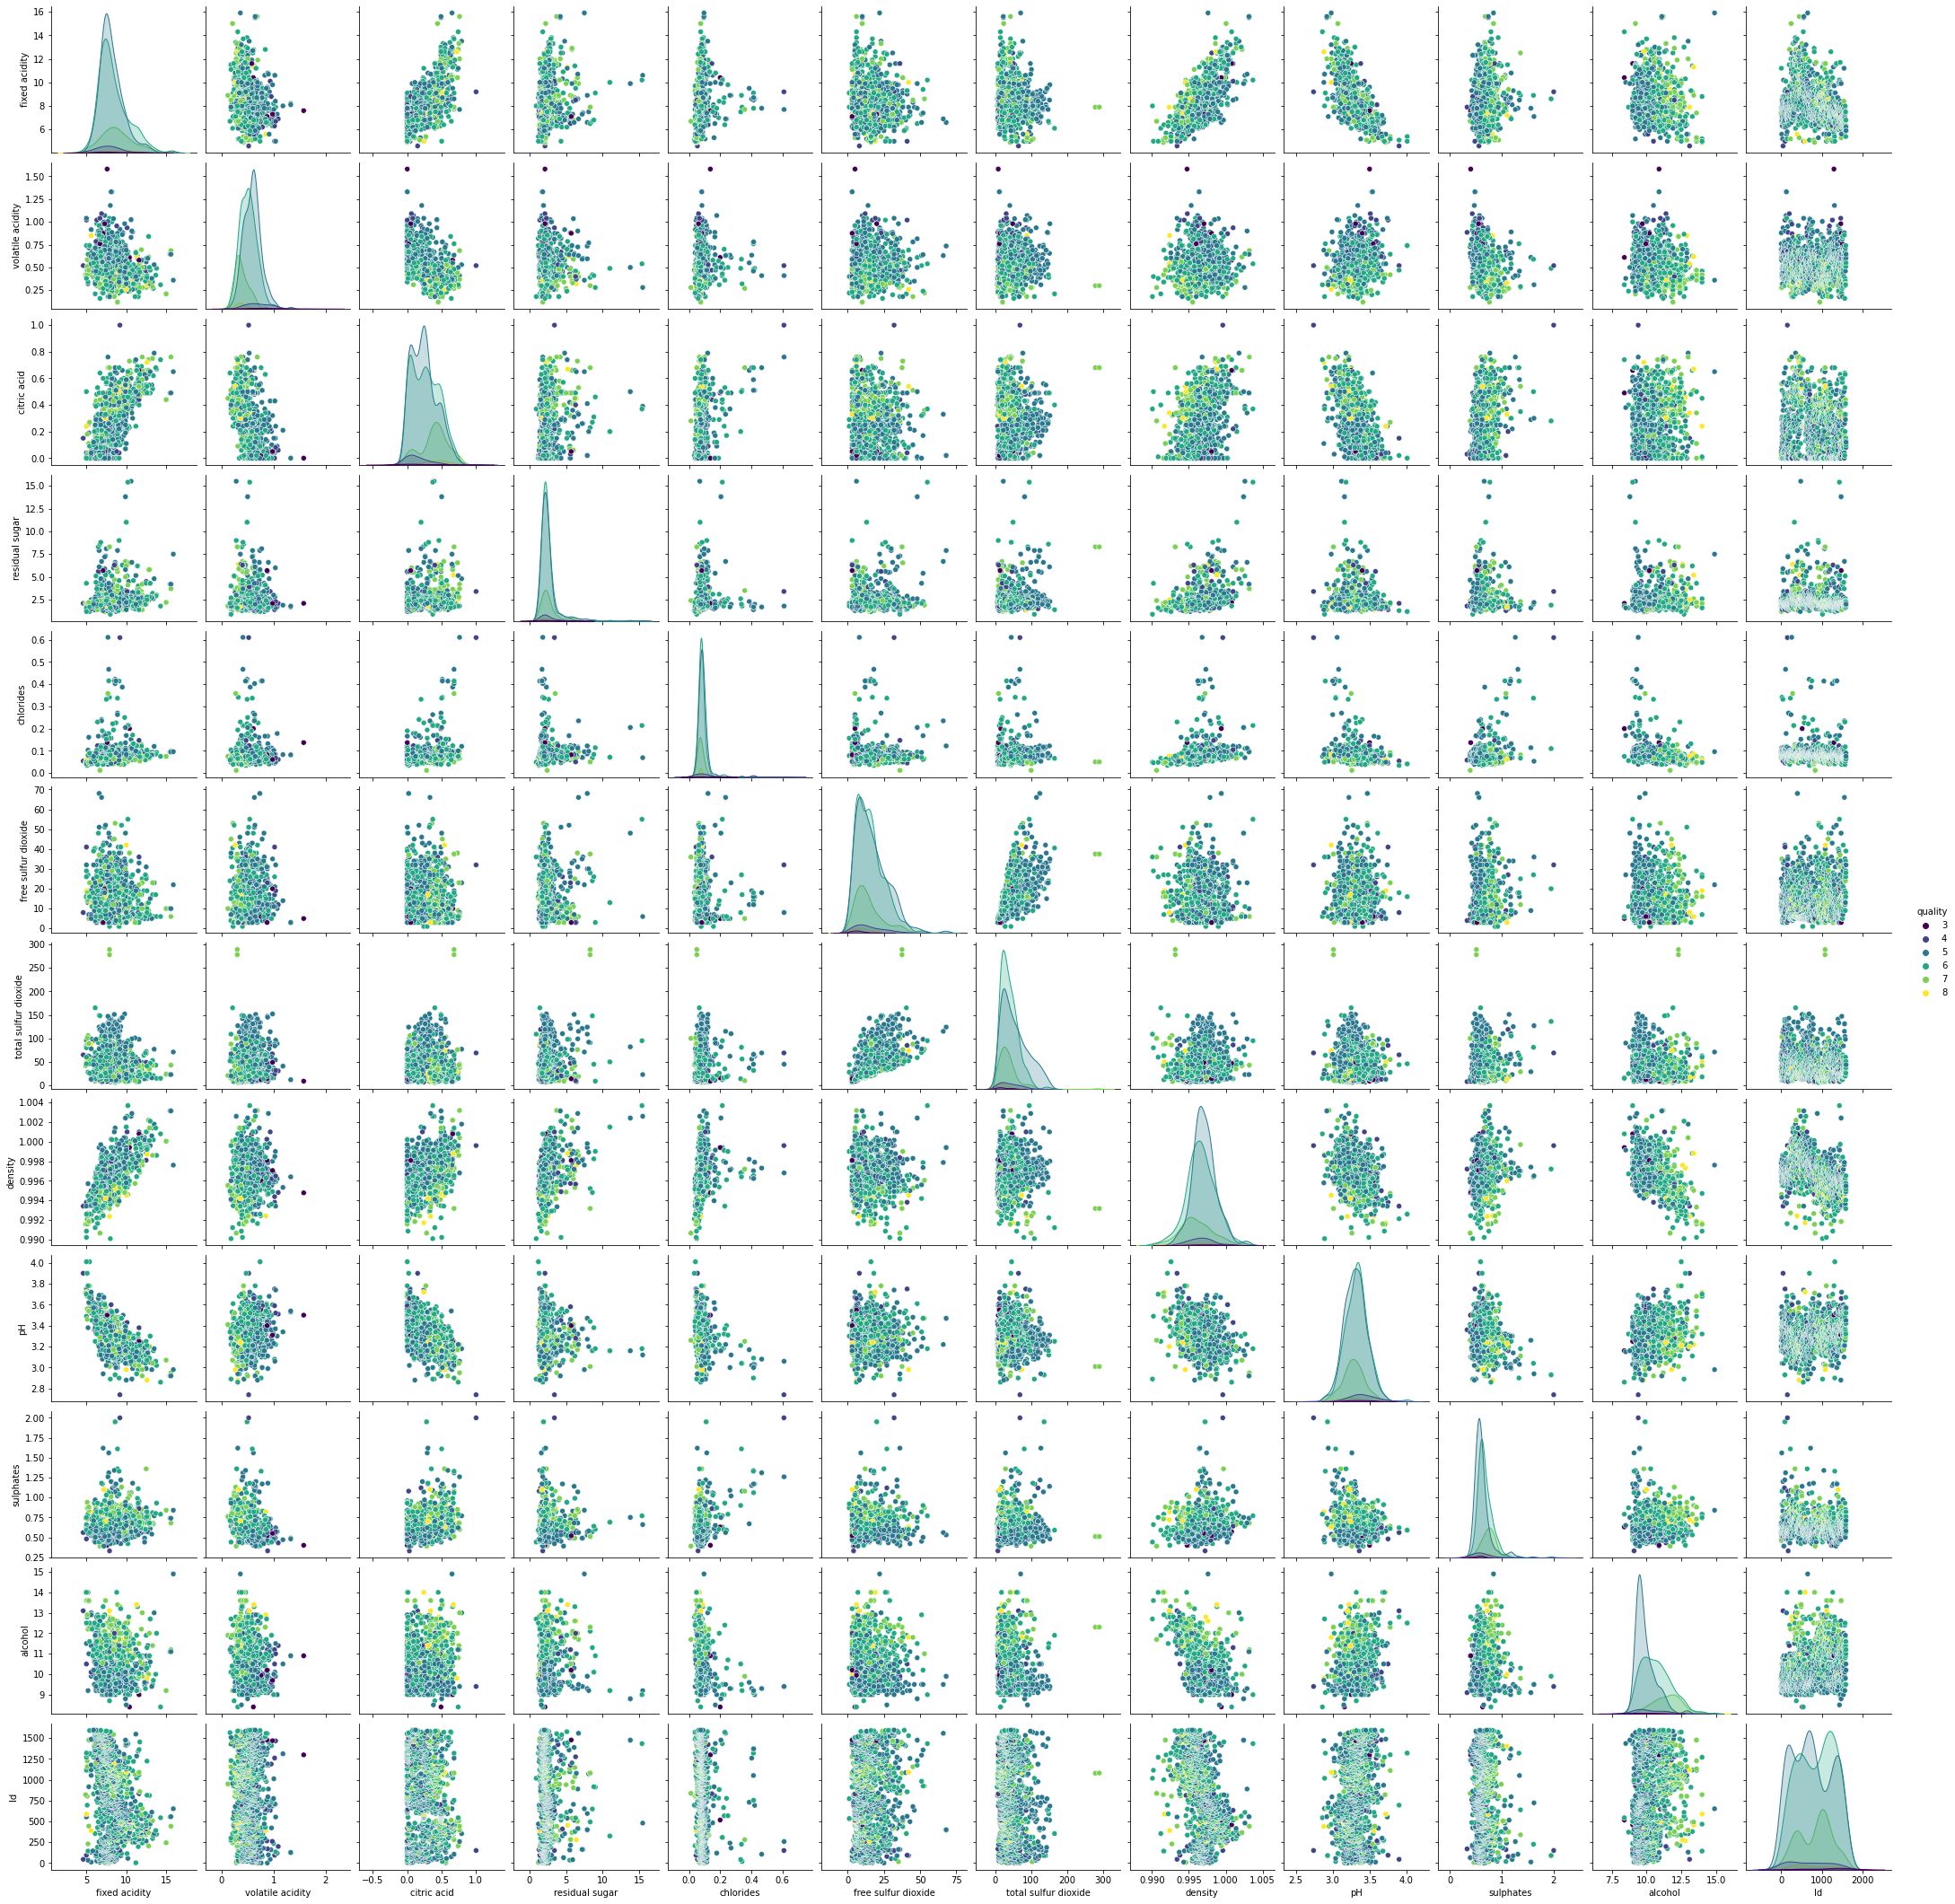

In [9]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='quality', palette='viridis')
plt.show()


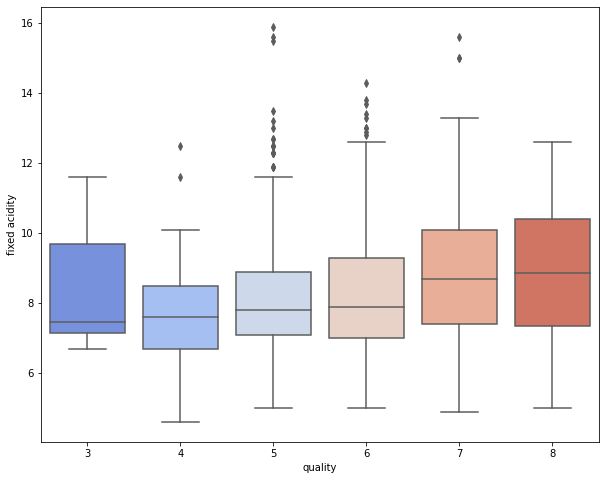

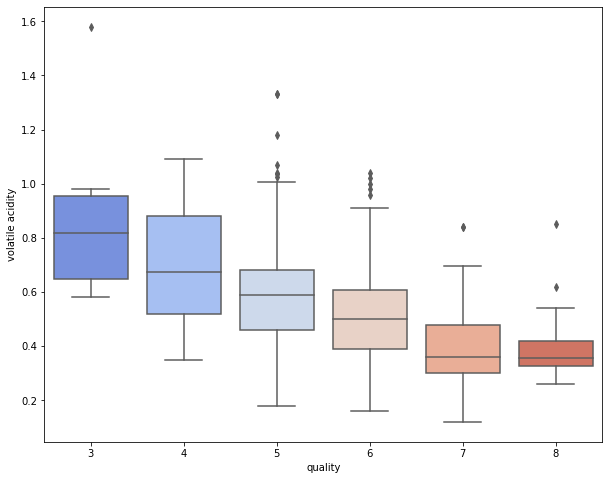

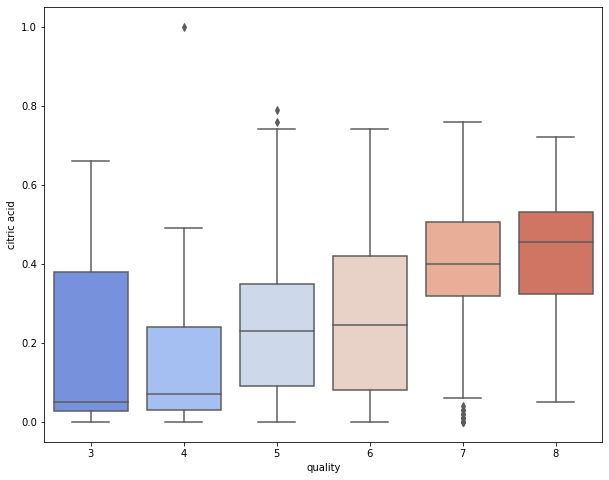

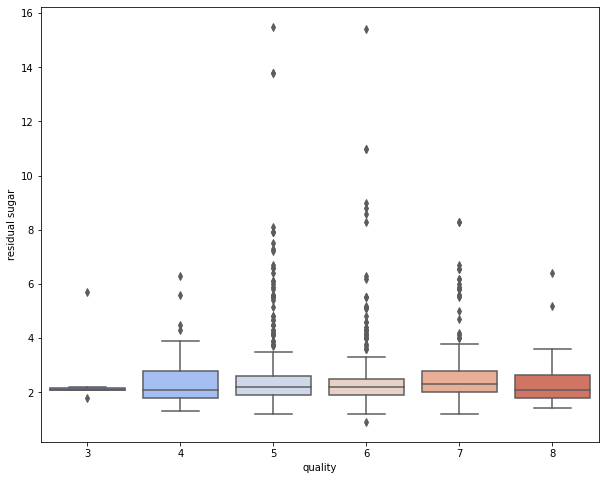

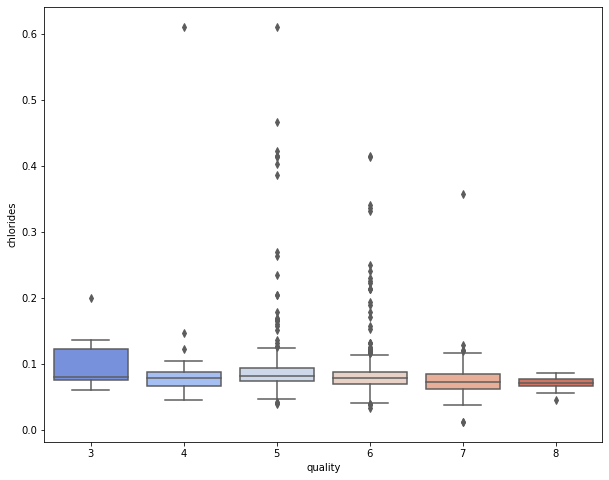

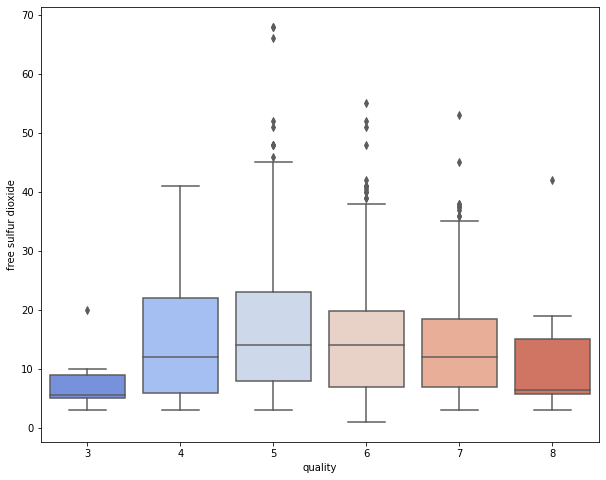

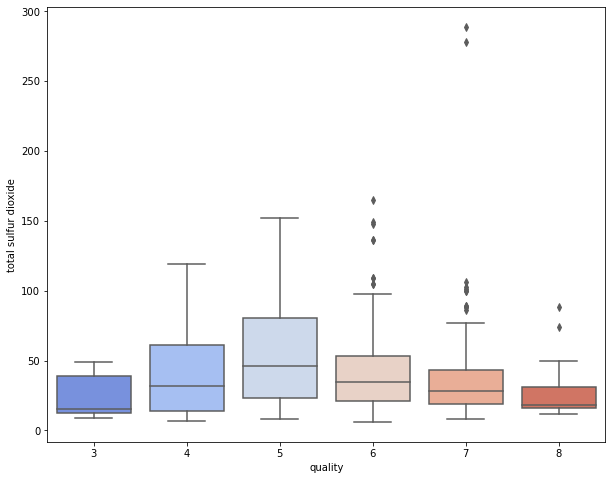

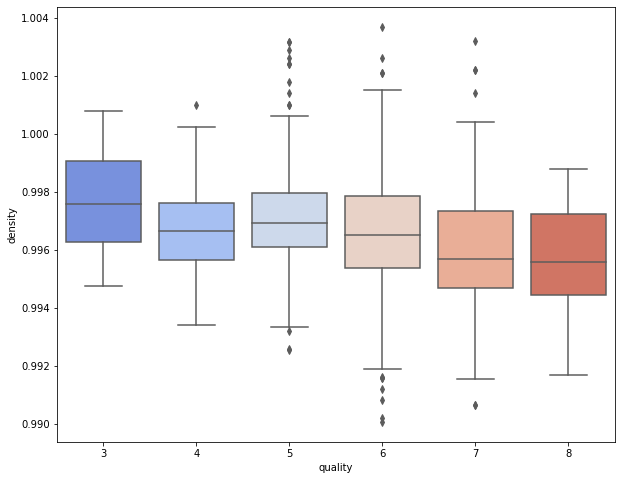

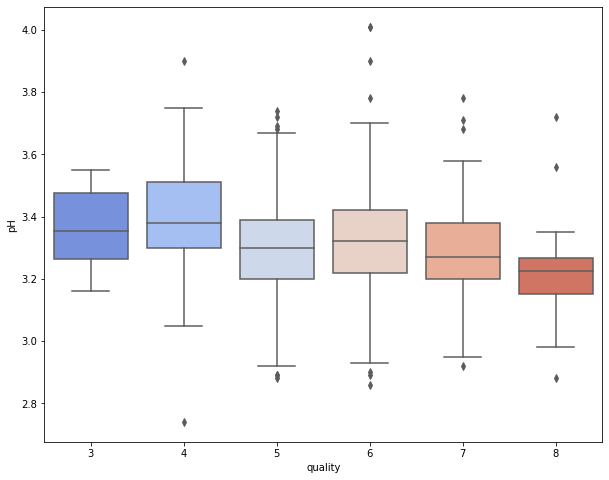

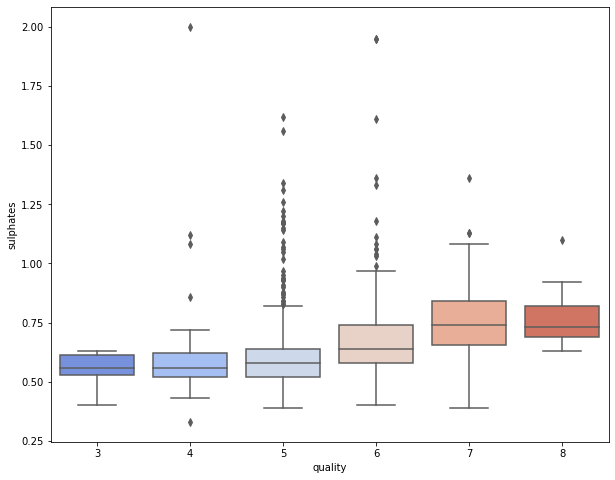

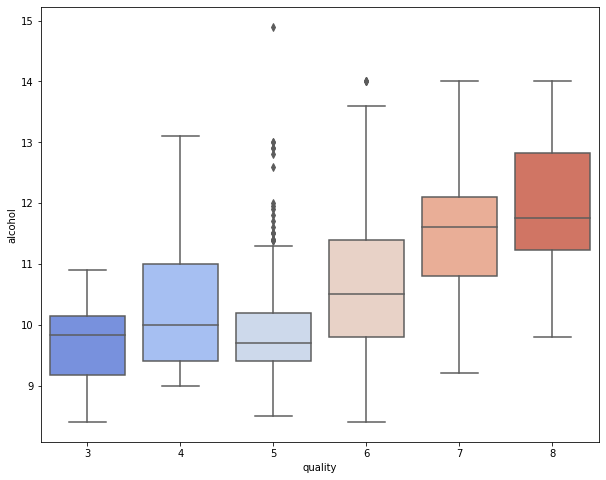

In [10]:

for column in df.columns[:-2]:
    plt.figure(figsize=(10, 8))# Exclude 'quality' and 'Id'
    sns.boxplot(x='quality', y=column, data=df, palette='coolwarm')
    plt.show()


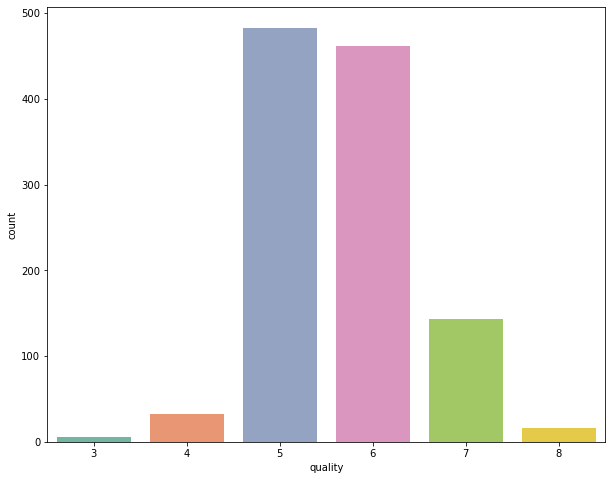

In [11]:
plt.figure(figsize=(10, 8))
sns.countplot(x='quality', data=df, palette='Set2')
plt.show()


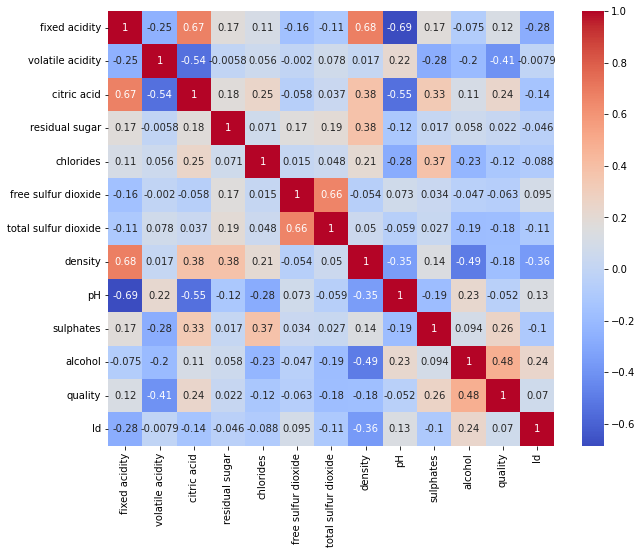

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


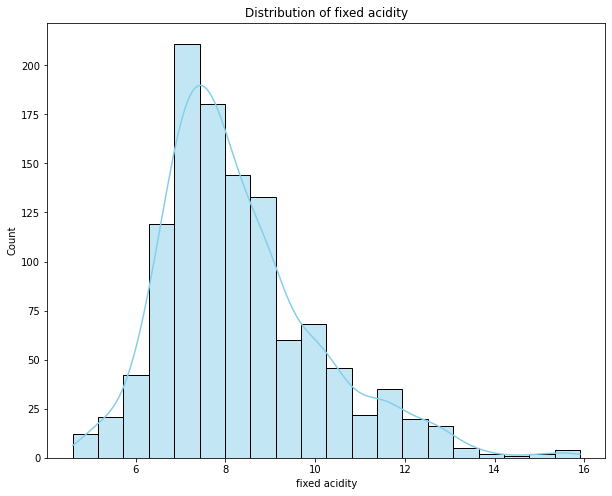

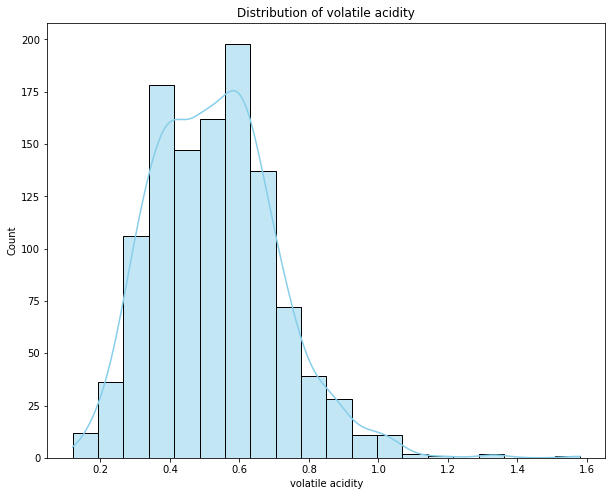

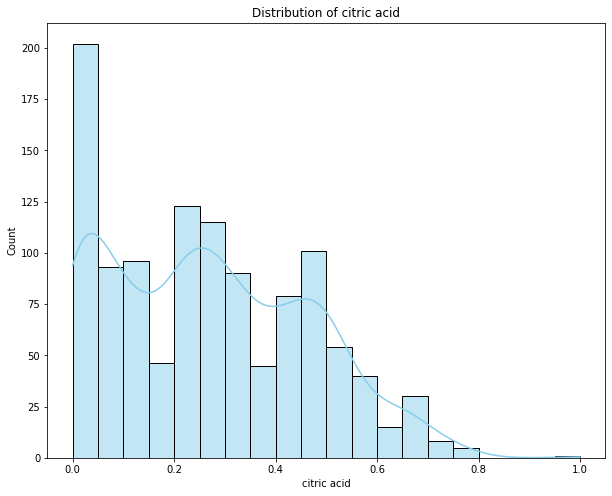

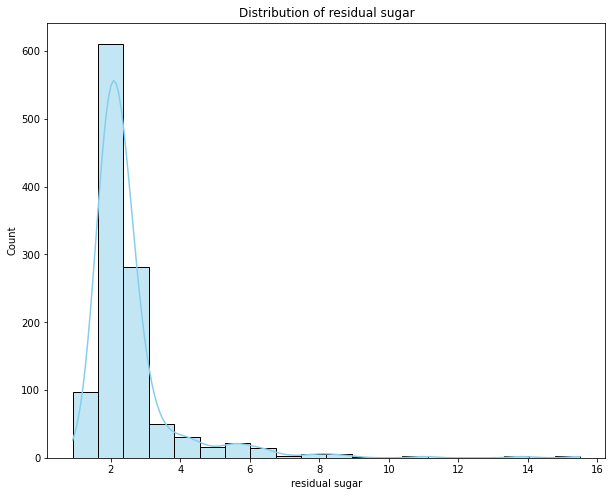

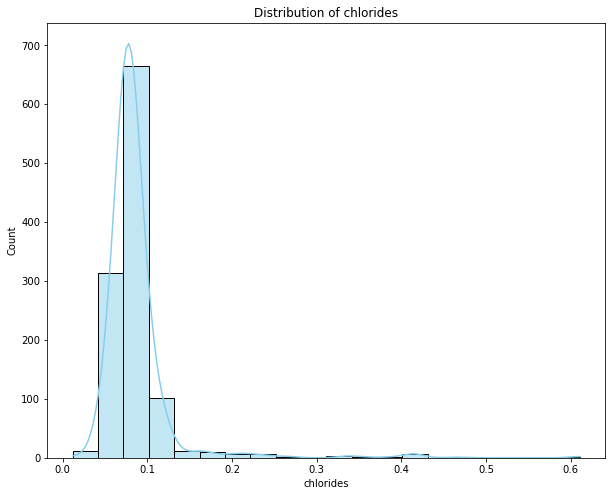

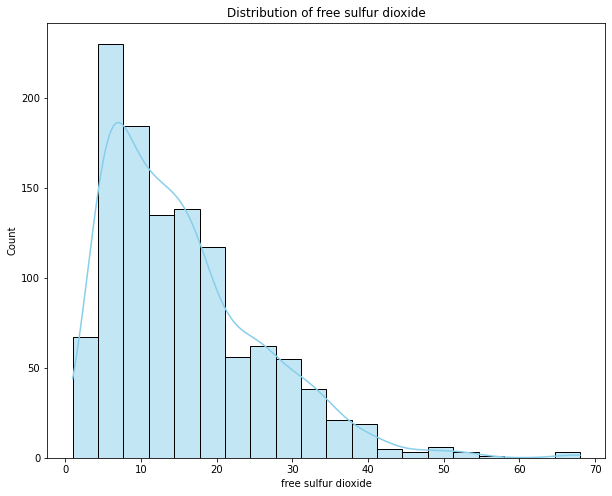

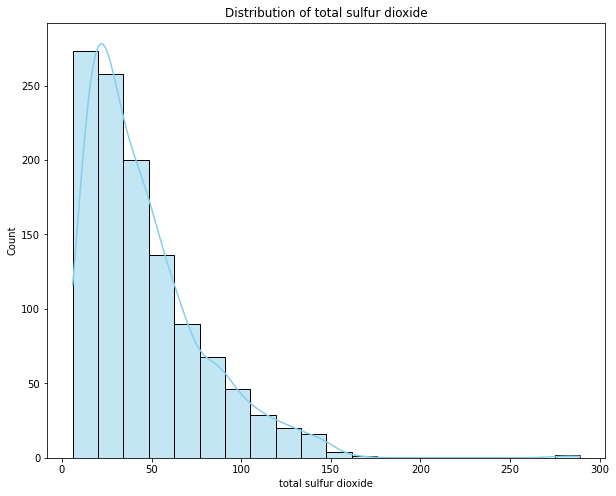

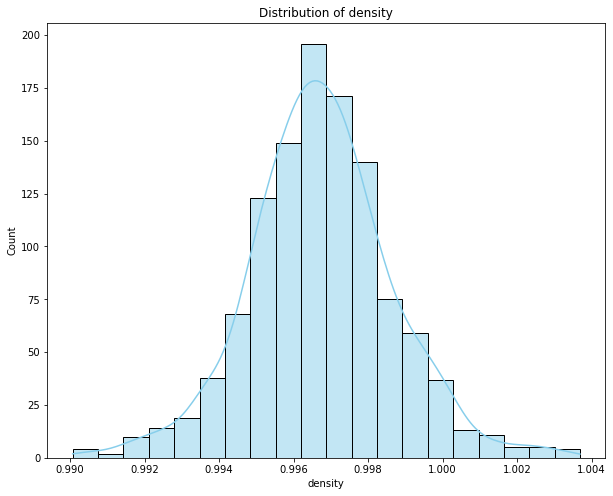

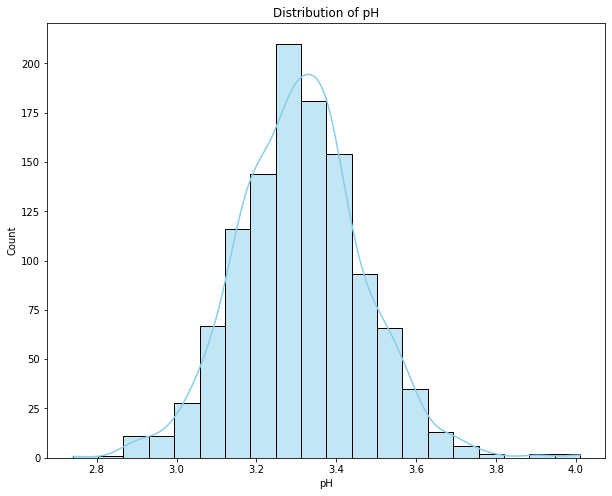

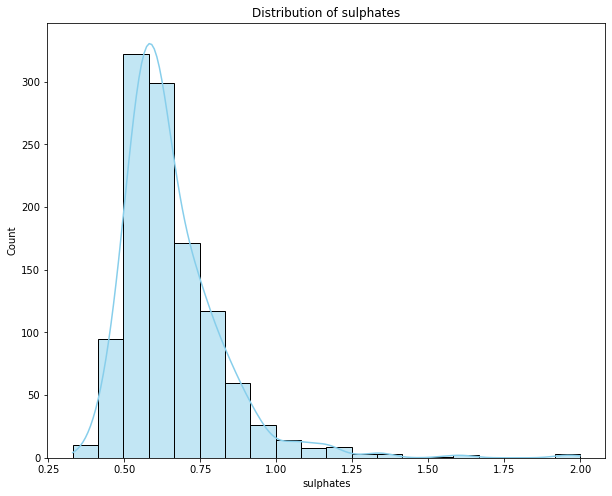

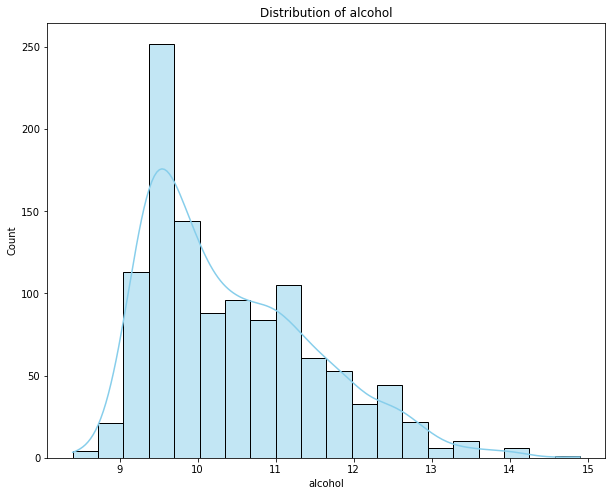

In [13]:
for column in df.columns[:-2]:  # Exclude 'quality' and 'Id'
    plt.figure(figsize=(10, 8))
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.show()


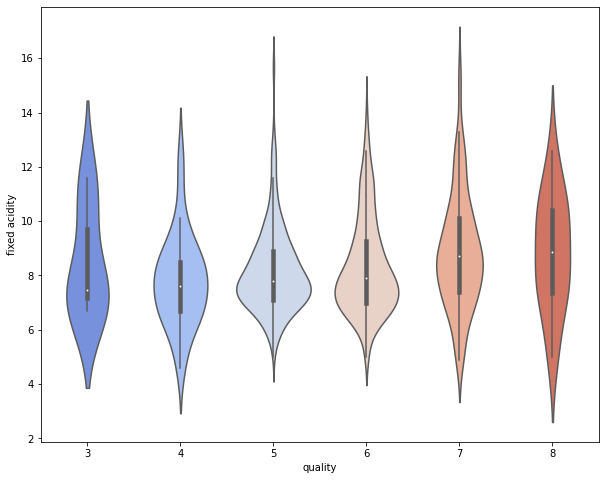

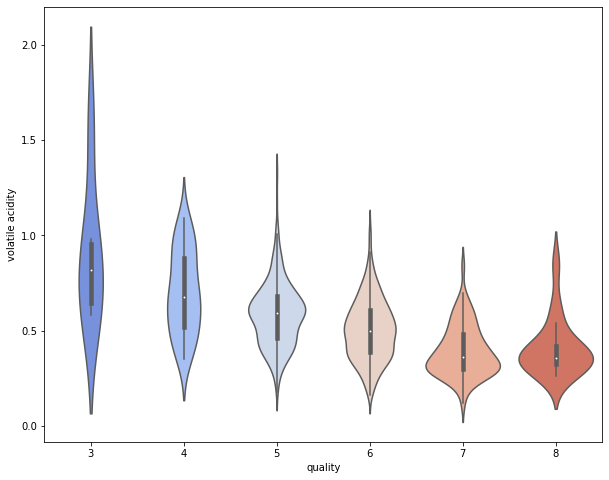

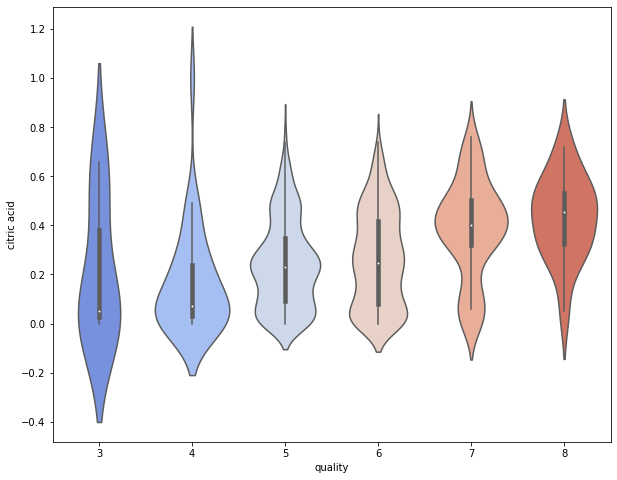

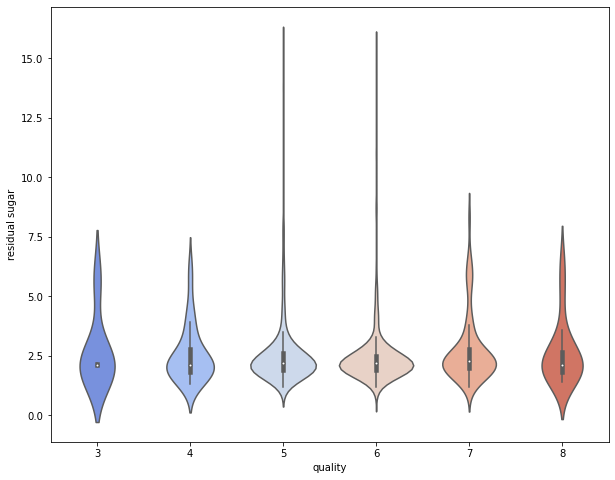

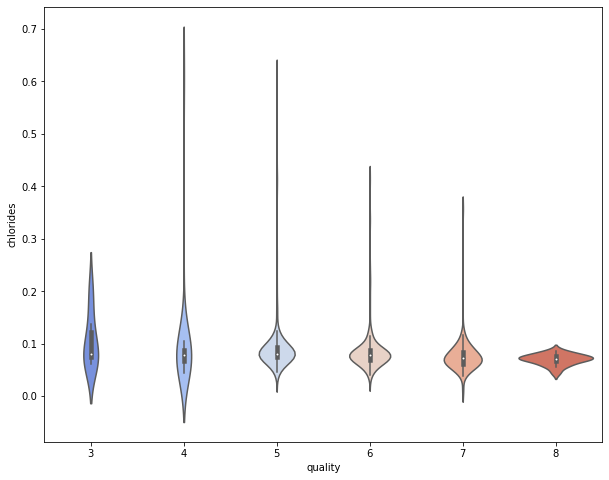

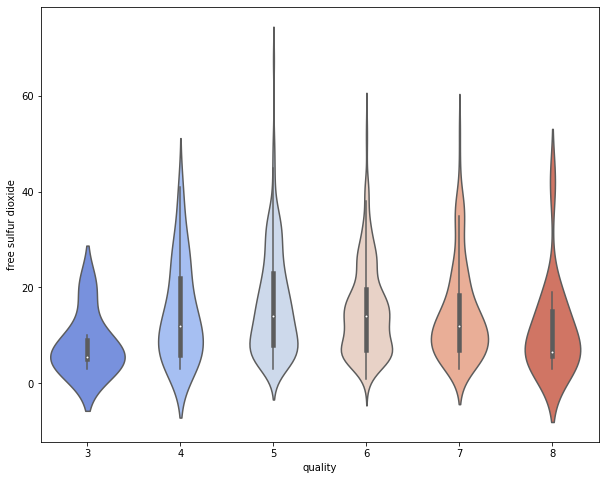

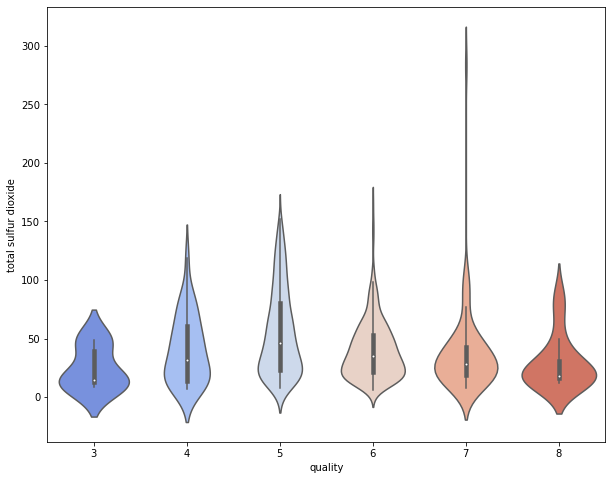

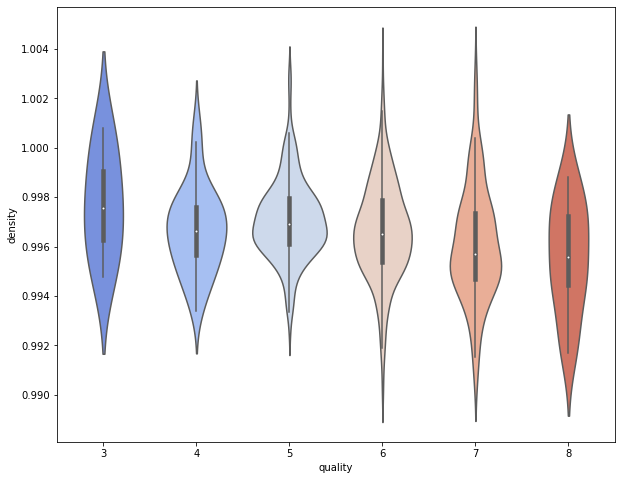

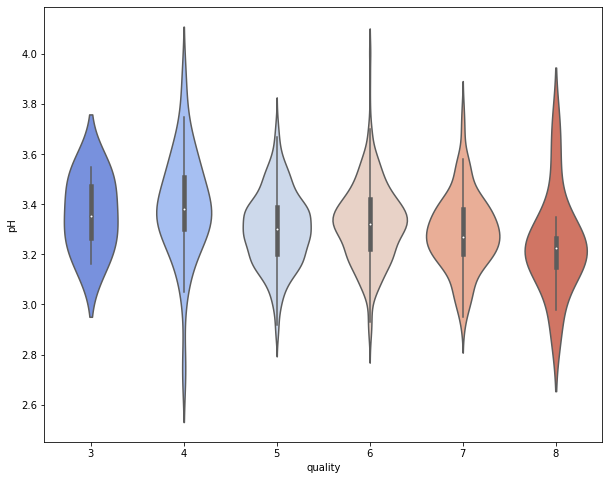

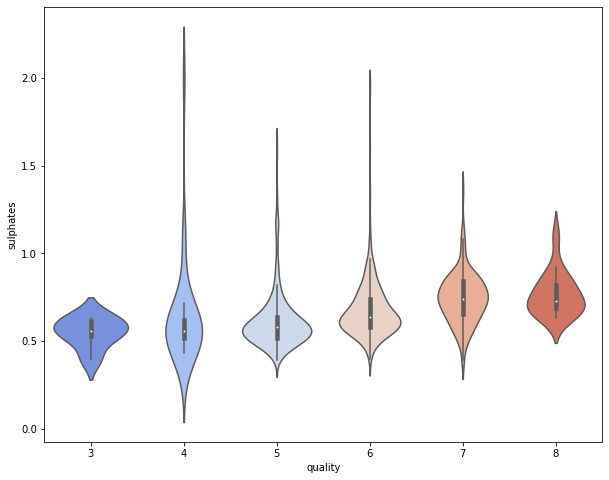

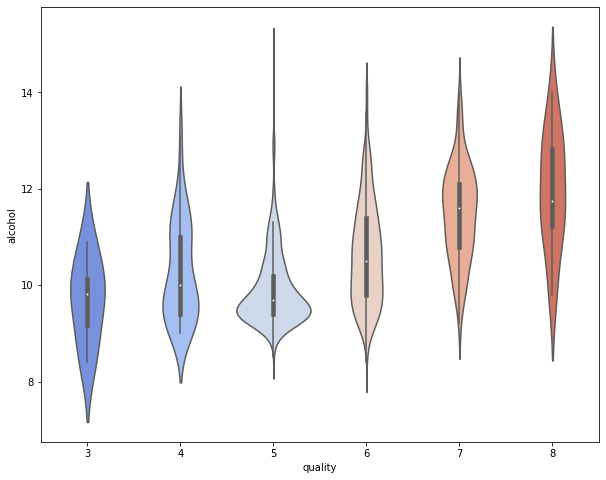

In [14]:
for column in df.columns[:-2]:  # Exclude 'quality' and 'Id'
    plt.figure(figsize=(10, 8))
    sns.violinplot(x='quality', y=column, data=df, palette='coolwarm')
    plt.show()


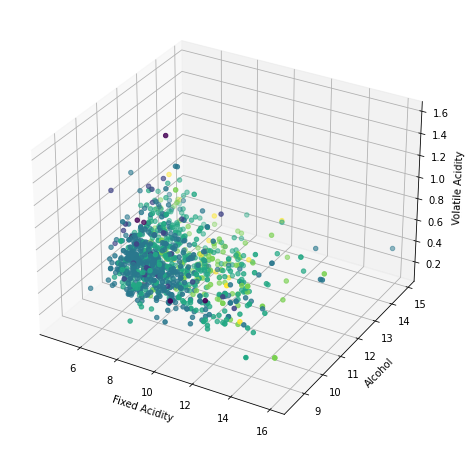

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['fixed acidity'], df['alcohol'], df['volatile acidity'], c=df['quality'], cmap='viridis')
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Volatile Acidity')
plt.show()


# Train-Test Split:

In [49]:
# Train-Test Split
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature Scaling:

In [50]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Random Forest Model:

In [51]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)



RandomForestClassifier()

# Stochastic Gradient Descent Model

In [52]:
# Stochastic Gradient Descent
sgd_model = SGDClassifier()
sgd_model.fit(X_train_scaled, y_train)



SGDClassifier()

# Support Vector Classifier Model:

In [53]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)



SVC()

# Model Evaluation Function:

In [54]:
def evaluate_model(model, X_test_scaled, y_test):
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

In [55]:

# Evaluate Random Forest
print("Random Forest Model:")
evaluate_model(rf_model, X_test_scaled, y_test)
print("\n")

Random Forest Model:
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.77      0.74        96
           6       0.66      0.67      0.66        99
           7       0.75      0.69      0.72        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.42      0.43      0.42       229
weighted avg       0.67      0.69      0.68       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 74 21  1  0]
 [ 0 28 66  5  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]




C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# Evaluate Stochastic Gradient Descent
print("Stochastic Gradient Descent Model:")
evaluate_model(sgd_model, X_test_scaled, y_test)
print("\n")

Stochastic Gradient Descent Model:
Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.57      0.60      0.59        96
           6       0.42      0.18      0.25        99
           7       0.33      0.62      0.43        26
           8       0.00      0.00      0.00         2

    accuracy                           0.40       229
   macro avg       0.26      0.28      0.25       229
weighted avg       0.46      0.40      0.40       229

Confusion Matrix:
 [[ 0  2  3  1  0]
 [12 58 21  5  0]
 [16 38 18 26  1]
 [ 5  4  1 16  0]
 [ 1  0  0  1  0]]




In [57]:
# Evaluate Support Vector Classifier
print("Support Vector Classifier Model:")
evaluate_model(svc_model, X_test_scaled, y_test)# Evaluate Stochastic Gradient Descent
print("Stochastic Gradient Descent Model:")
evaluate_model(sgd_model, X_test_scaled, y_test)
print("\n")


Support Vector Classifier Model:
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 26 68  5  0]
 [ 0  1 18  7  0]
 [ 0  0  1  1  0]]
Stochastic Gradient Descent Model:
Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.57      0.60      0.59        96
           6       0.42      0.18      0.25        99
           7       0.33      0.62     

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
# Evaluate Support Vector Classifier
print("Support Vector Classifier Model:")
evaluate_model(svc_model, X_test_scaled, y_test)

Support Vector Classifier Model:
Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 26 68  5  0]
 [ 0  1 18  7  0]
 [ 0  0  1  1  0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Conclusion:

The provided code orchestrates a comprehensive expedition into the realms of data exploration, feature engineering, and machine learning, all in pursuit of predicting wine quality. The deployment of a trio of sophisticated classifier models—Random Forest, Stochastic Gradient Descent, and Support Vector Classifier (SVC)—sets the stage for an exhaustive evaluation of predictive performance.





# Exploring Predictors:
The astute identification of chemical qualities, notably density and acidity, as potential predictors for wine quality reflects a profound understanding of the viticulture domain. These features, ingrained in the essence of winemaking, often serve as reliable indicators of the final product's sensory characteristics, showcasing the code's domain-specific acumen.




# Enhancing Feature Space:
A strategic move unfolds in the feature engineering step, marked by the creation of the 'total_sulfur_dioxide' variable. This deliberate action transcends traditional approaches, showcasing a recognition of the interconnected nature of chemical attributes. By incorporating additional chemical properties, the feature space is not just broadened; it becomes a canvas for potentially nuanced insights into the intricate world of wine quality.




# Efficient Data Manipulation:
Pandas, the stalwart of data manipulation, emerges as the linchpin in this analytical journey. Its versatile capabilities form the bedrock for efficient handling, manipulation, and exploration of the dataset. The code stands on the shoulders of Pandas, using its power to unveil the hidden facets of the data and laying a solid foundation for subsequent analytical endeavors.




# Statistical Insights with Numpy:
In the pursuit of understanding the dataset at a quantitative level, Numpy takes center stage for array operations. The calculated mean and standard deviation for selected features serve as beacons, guiding the way through the labyrinth of data. These statistical insights into central tendency and variability become crucial signposts, steering the analytical decisions that follow.




# Visual Storytelling with Seaborn and Matplotlib:
Acknowledging the potency of visual storytelling, the code deftly employs Seaborn and Matplotlib to weave a narrative from the dataset. Pair plots emerge as storytellers of multivariate relationships, box plots craft narratives about feature distributions, and heatmaps paint visual synopses of intricate feature correlations. These visualizations are not mere embellishments; they are indispensable tools for decoding the data's language.




# Holistic Data Science Workflow:
What distinguishes this code is its commitment to a holistic data science workflow. It traverses the entire spectrum, from the preliminary steps of data preprocessing and exploration to the intricate dance of feature engineering. The journey unfolds further as machine learning models take the stage, leading to a crescendo of rich visualizations that encapsulate the essence of the dataset.




# Diverse Classifier Models:
The deliberate inclusion of diverse classifier models—Random Forest, Stochastic Gradient Descent, and Support Vector Classifier (SVC)—is a testament to a nuanced understanding of the dataset's complexities. This diversity is not arbitrary; it is a strategic choice that allows practitioners to glean insights from different perspectives. Each model contributes its unique strengths, culminating in a more profound understanding of the dataset.




# Versatile Toolkit for Prediction:
In crafting a predictive toolkit, the code transcends the one-size-fits-all mentality. The focus on chemical qualities and the eclectic array of classifiers endows practitioners with a versatile toolkit for predicting wine quality. This toolkit is not rigid; it is a flexible instrument that can be tuned and tailored to the unique characteristics of the dataset at hand.




# Enriching Predictive Modeling:
This code, however, does not stop at predictive modeling; it embarks on a journey to enrich the very fabric of understanding. By delving into chemical qualities and using visual representations as a medium, it elevates the interpretability of the models. The dual emphasis on accuracy and interpretability is a strategic choice that acknowledges the real-world applications of predictive models.




### In Conclusion:
In its entirety, this code stands not as a mere sequence of technical steps but as a thoughtful and strategic approach to solving a predictive modeling problem. It embodies the essence of data science by seamlessly marrying domain knowledge with machine learning techniques. It goes beyond the syntax and algorithms, offering a holistic and insightful exploration of wine quality prediction. This code is not just an analytical endeavor; it is a narrative that unfolds the intricacies of the dataset, telling a story that goes beyond numbers and charts. It is a testament to the art and science of data exploration and prediction.